Un magazin este vizitat de n clienți într-o anumită zi. Numărul Y de clienți care cumpără un anumit produs e distribuit Binomial (n, 0), unde este probabilitatea ca un client să cumpere acel produs. Să presupunem că îl cunoaştem pe o şi că distribuția a priori pentru a este Poisson(10).

1. Folosiți PyMC pentru a calcula distribuția a posteriori pentru n pentru toate combinațiile de Y € (0,5, 10) şi e (0.2,0.5). Folosiți az.plot_posterior pentru a vizualiza toate rezultatele (ideal, într- o singură fereastră).

Output()

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Output()

Output()

Output()

ERROR:pymc.stats.convergence:There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

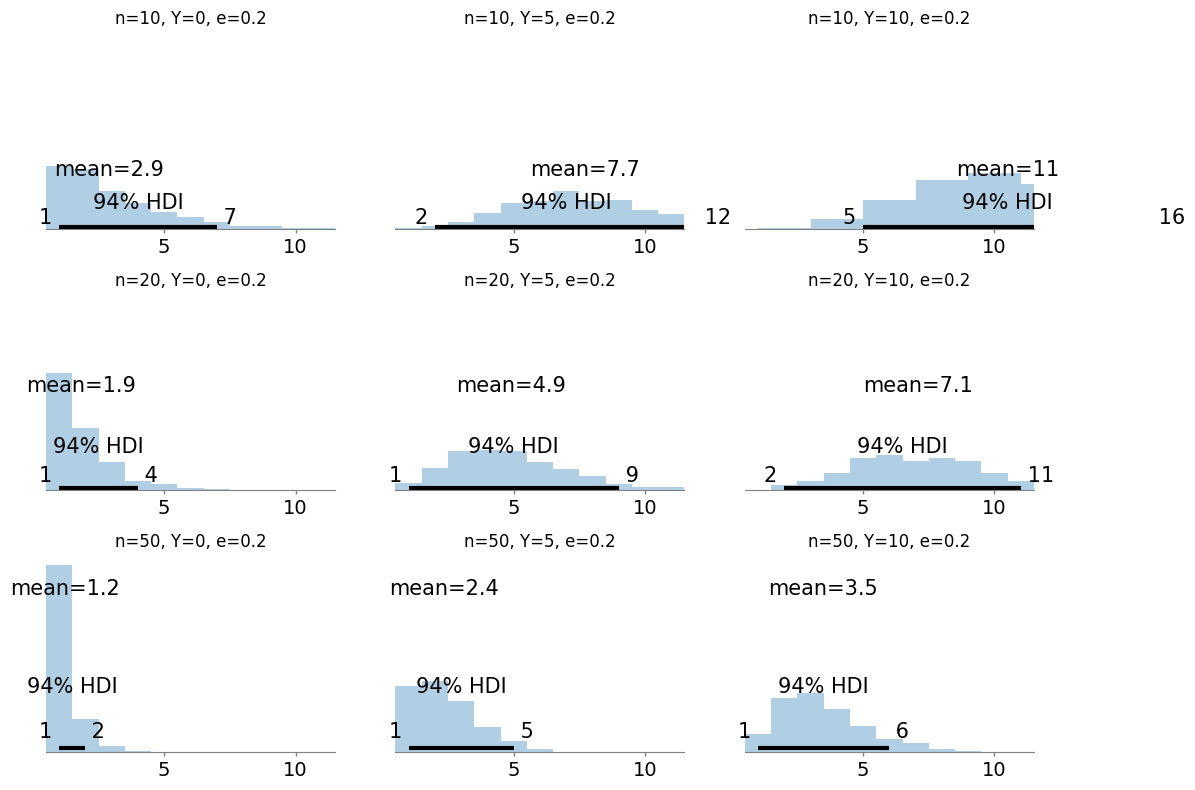

In [4]:
import pymc
import arviz
import numpy
import matplotlib.pyplot as plot

n_values = [10, 20, 50]
Y_values = [0, 5, 10]
e_values = [0.2, 0.5]

results = {}

for n in n_values:
    for Y in Y_values:
        for e in e_values:
            with pymc.Model() as model:
                a = pymc.Poisson('a', mu=10)
                p = pymc.Beta('p', alpha=a, beta=1)
                Y_obs = pymc.Binomial('Y_obs', n=n, p=p, observed=Y)
                trace = pymc.sample(2000, tune=1000, return_inferencedata=True, cores=2)
                results[(n, Y, e)] = trace

fig, axes = plot.subplots(len(n_values), len(Y_values), figsize=(12, 8), sharex=True, sharey=True)

for i, n in enumerate(n_values):
    for j, Y in enumerate(Y_values):
        ax = axes[i, j]
        arviz.plot_posterior(
            results[(n, Y, e_values[0])].posterior['a'],
            ax=ax,
            hdi_prob=0.94
        )
        ax.set_title(f"n={n}, Y={Y}, e={e_values[0]}")
plot.tight_layout()
plot.show()

2. Explicaţi efectul lui Y şi θ asupra distribuției a posteriori.

Creșterea lui Y (nr de clienti) deplaseaza distributia a posteriori a lui a catre valori mai mari, indicand o rata mai mare de succes pentru produs.

Valori mai mari pentru θ (prob de cumparare) concentreaza distributia a posteriori, micsorand incertitudinea in estimarea parametrilor. Valori mai mici fac distributia mai larga => incertitudine mai mare.